To identify the most influential features affecting infection and mortality rates using statistical correlation and hypothesis testing.


In [ ]:
# Load dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#Reading our dataset
df = pd.read_excel('/content/drive/MyDrive/ML_ENEZA/weekly_covid_data_combined.xlsx')

Creating a correlation matrix to show the pairwise correlation coefficients.

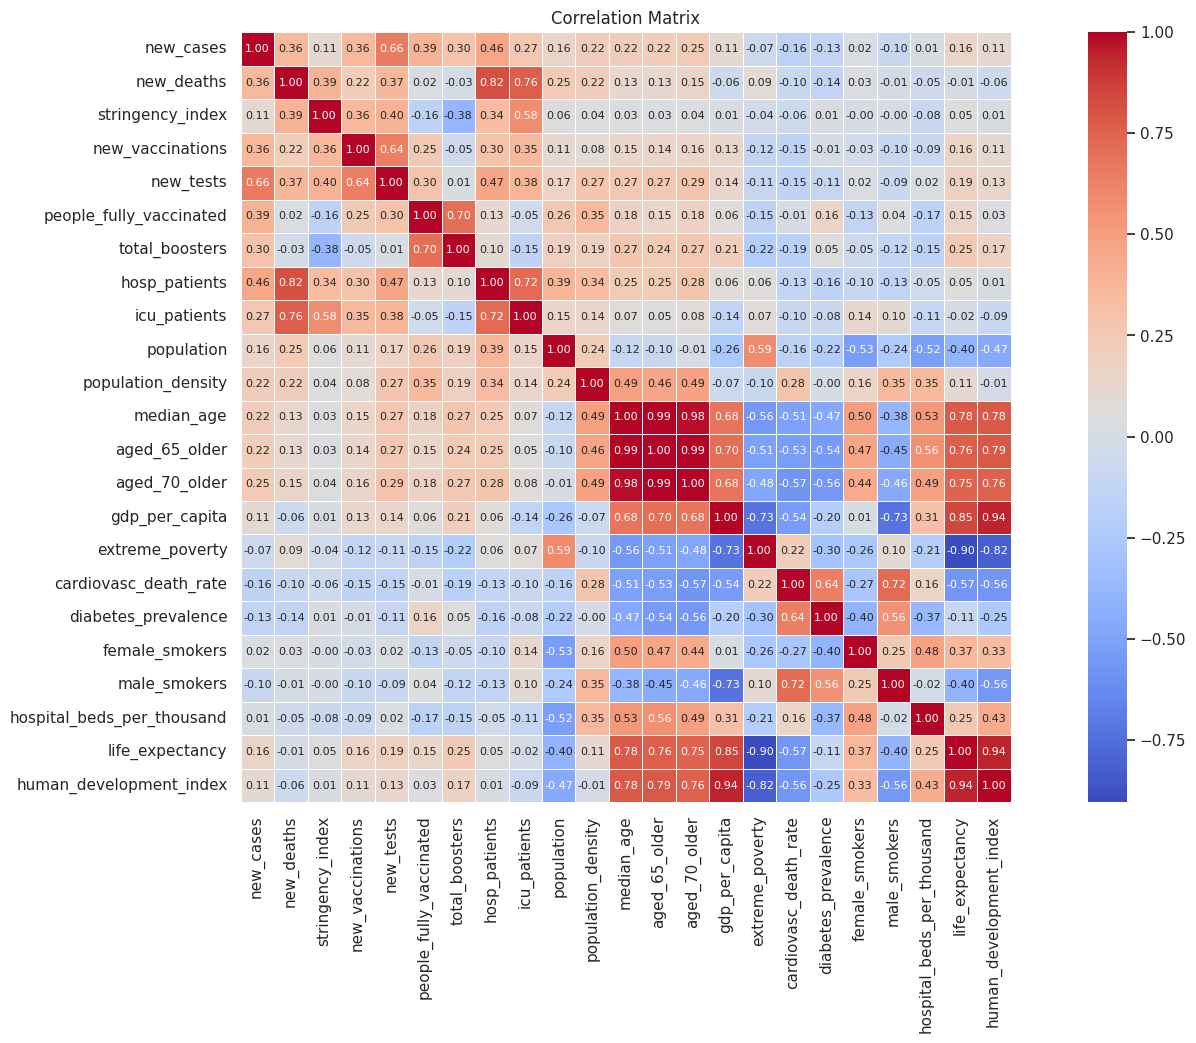

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

Removing duplicate correlations and the self-correlations from the matrix.

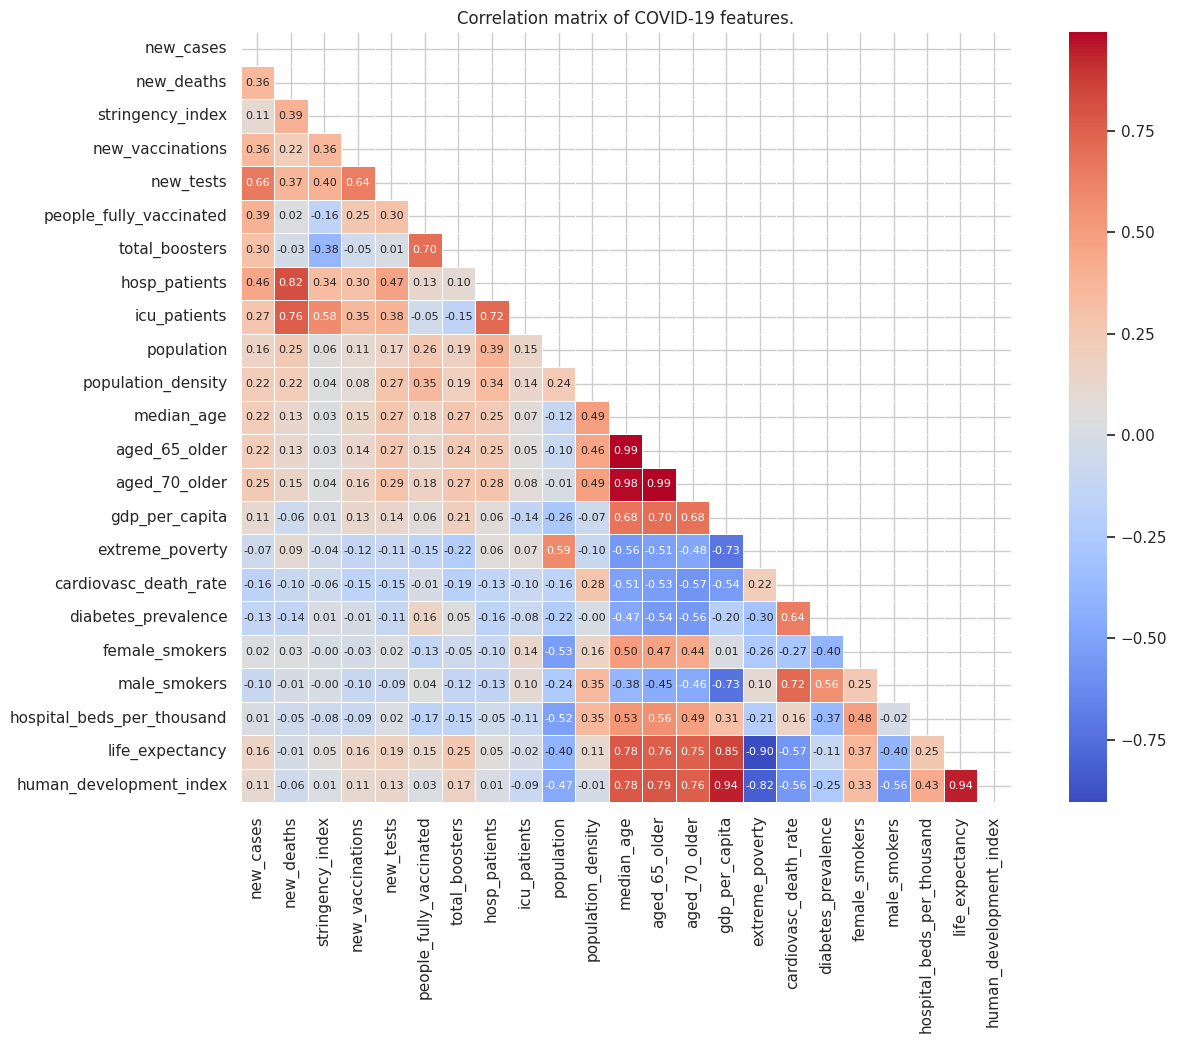

In [ ]:
# Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Remove self-correlations (diagonal = NaN)
np.fill_diagonal(corr.values, np.nan)

# Remove duplicate correlations (keep lower triangle, set upper triangle to NaN)
corr_clean = corr.where(np.tril(np.ones(corr.shape), k=-1).astype(bool))

# Plot the cleaned matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_clean, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, cbar=True, annot_kws={"size": 8})
plt.title("Correlation matrix of COVID-19 features.")
plt.show()


Testing whether the correlations observed above are statistically signinficant using p-values. To do this we use the Pearson correlation test which returns a correlation coefficient(r) and a p-value. The **correlation coefficient** shows how strong a relationship is while the **p-value** shows whether the relationship is statistically is real and not due to chance. In this case our hypotheses are:

 **Null hypothesis:** There is no linear correlation between the features and new cases and new deaths.

 **Alternate Hypothesis:** There is a linear relationship between the features and new cases and new deaths

In [ ]:
#Defining my features as a variable called features
features = ['continent','location','date','new_cases','new_deaths','icu_patients','hosp_patients','new_tests','people_fully_vaccinated','total_boosters','new_vaccinations','stringency_index','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand','life_expectancy','human_development_index','population']



In [ ]:
#Creating a dataframe with clean features.
df_clean = df[features].dropna()


In [ ]:
# Checking the data types in my data frame
df_clean.dtypes

,0
continent,object
location,object
date,datetime64[ns]
new_cases,int64
new_deaths,int64
icu_patients,int64
hosp_patients,int64
new_tests,int64
people_fully_vaccinated,int64
total_boosters,int64


In [ ]:
# Converting my features variable to numeric to allow plotting
for col in features:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

In [ ]:
from scipy.stats import pearsonr

for feature in features:
    if feature not in ['new_cases', 'new_deaths']:
        r_cases, p_cases = pearsonr(df_clean[feature], df_clean['new_cases'])
        r_deaths, p_deaths = pearsonr(df_clean[feature], df_clean['new_deaths'])

        print(f"{feature} vs new_cases: r = {r_cases:.2f}, p = {p_cases:.4f}")
        print(f"{feature} vs new_deaths: r = {r_deaths:.2f}, p = {p_deaths:.4f}\n")

continent vs new_cases: r = nan, p = nan
continent vs new_deaths: r = nan, p = nan

location vs new_cases: r = nan, p = nan
location vs new_deaths: r = nan, p = nan

date vs new_cases: r = -0.06, p = 0.0147
date vs new_deaths: r = -0.26, p = 0.0000

icu_patients vs new_cases: r = 0.27, p = 0.0000
icu_patients vs new_deaths: r = 0.76, p = 0.0000

hosp_patients vs new_cases: r = 0.46, p = 0.0000
hosp_patients vs new_deaths: r = 0.82, p = 0.0000

new_tests vs new_cases: r = 0.66, p = 0.0000
new_tests vs new_deaths: r = 0.37, p = 0.0000

people_fully_vaccinated vs new_cases: r = 0.39, p = 0.0000
people_fully_vaccinated vs new_deaths: r = 0.02, p = 0.3248

total_boosters vs new_cases: r = 0.30, p = 0.0000
total_boosters vs new_deaths: r = -0.03, p = 0.2890

new_vaccinations vs new_cases: r = 0.36, p = 0.0000
new_vaccinations vs new_deaths: r = 0.22, p = 0.0000

stringency_index vs new_cases: r = 0.11, p = 0.0000
stringency_index vs new_deaths: r = 0.39, p = 0.0000

population_density vs new

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Collect correlation results
results = []

for feature in features:
    if feature not in ['new_cases', 'new_deaths']:
        r_cases, p_cases = pearsonr(df_clean[feature], df_clean['new_cases'])
        r_deaths, p_deaths = pearsonr(df_clean[feature], df_clean['new_deaths'])

        results.append({
            'Feature': feature,
            'r with new_cases': round(r_cases, 3),
            'p with new_cases': round(p_cases, 4),
            'r with new_deaths': round(r_deaths, 3),
            'p with new_deaths': round(p_deaths, 4)
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Filter statistically significant features (p < 0.05)
significant_cases = results_df[results_df['p with new_cases'] < 0.05].copy()
significant_deaths = results_df[results_df['p with new_deaths'] < 0.05].copy()

# Add absolute r values for sorting
significant_cases['|r|'] = significant_cases['r with new_cases'].abs()
significant_deaths['|r|'] = significant_deaths['r with new_deaths'].abs()

# Sort by strength of correlation
significant_cases.sort_values(by='|r|', ascending=False, inplace=True)
significant_deaths.sort_values(by='|r|', ascending=False, inplace=True)

# Drop the helper column before display
significant_cases.drop(columns='|r|', inplace=True)
significant_deaths.drop(columns='|r|', inplace=True)

# Display
print("\n📊 Significant Correlations with New Cases (p < 0.05):\n")
print(significant_cases.to_string(index=False))

print("\n📊 Significant Correlations with New Deaths (p < 0.05):\n")
print(significant_deaths.to_string(index=False))



📊 Significant Correlations with New Cases (p < 0.05):

                Feature  r with new_cases  p with new_cases  r with new_deaths  p with new_deaths
              new_tests             0.656            0.0000              0.371             0.0000
          hosp_patients             0.459            0.0000              0.817             0.0000
people_fully_vaccinated             0.394            0.0000              0.024             0.3248
       new_vaccinations             0.361            0.0000              0.220             0.0000
         total_boosters             0.300            0.0000             -0.026             0.2890
           icu_patients             0.270            0.0000              0.764             0.0000
          aged_70_older             0.248            0.0000              0.154             0.0000
          aged_65_older             0.222            0.0000              0.126             0.0000
             median_age             0.216            0.0000   

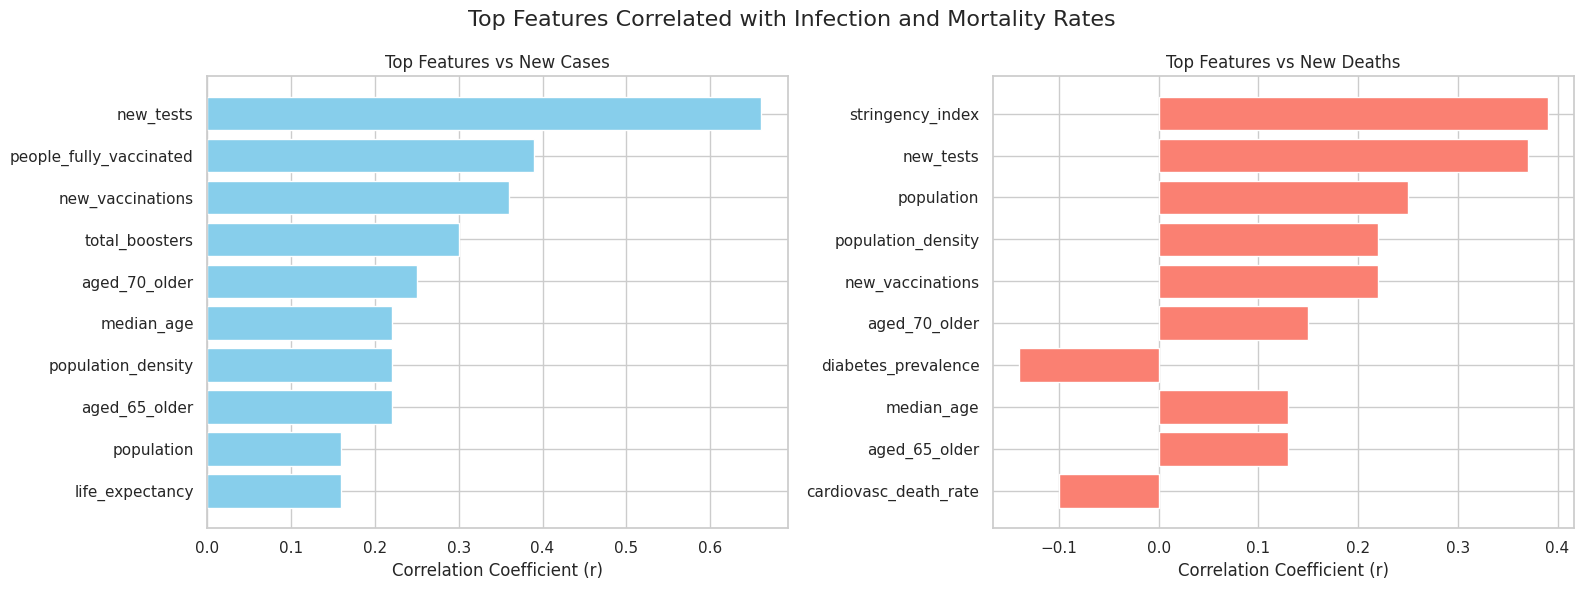

In [ ]:
# Manually create the correlation data
data = {
    'Feature': [
        'new_tests', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'stringency_index',
        'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
        'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
        'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'population'
    ],
    'r_new_cases': [
        0.66, 0.39, 0.30, 0.36, 0.11,
        0.22, 0.22, 0.22, 0.25, 0.11,
        -0.07, -0.16, -0.13, 0.02,
        -0.10, 0.01, 0.16, 0.11, 0.16
    ],
    'r_new_deaths': [
        0.37, 0.02, -0.03, 0.22, 0.39,
        0.22, 0.13, 0.13, 0.15, -0.06,
        0.09, -0.10, -0.14, 0.03,
        -0.01, -0.05, -0.01, -0.06, 0.25
    ]
}

df = pd.DataFrame(data)

# Take absolute value of correlation
df['abs_r_new_cases'] = df['r_new_cases'].abs()
df['abs_r_new_deaths'] = df['r_new_deaths'].abs()

# Get top N features
top_n = 10
top_cases = df.sort_values('abs_r_new_cases', ascending=False).head(top_n)
top_deaths = df.sort_values('abs_r_new_deaths', ascending=False).head(top_n)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Top Features Correlated with Infection and Mortality Rates", fontsize=16)

# Infection
axes[0].barh(top_cases['Feature'], top_cases['r_new_cases'], color='skyblue')
axes[0].set_title('Top Features vs New Cases')
axes[0].invert_yaxis()
axes[0].set_xlabel('Correlation Coefficient (r)')

# Mortality
axes[1].barh(top_deaths['Feature'], top_deaths['r_new_deaths'], color='salmon')
axes[1].set_title('Top Features vs New Deaths')
axes[1].invert_yaxis()
axes[1].set_xlabel('Correlation Coefficient (r)')

plt.tight_layout()
plt.show()


In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')  # convert non-numeric to NaN


In [ ]:
import statsmodels.api as sm

X = df_clean.drop(['new_cases', 'new_deaths'], axis=1)
X = sm.add_constant(X)

# For new_cases
model_cases = sm.OLS(df_clean['new_cases'], X).fit()
print(model_cases.summary())

# For new_deaths
model_deaths = sm.OLS(df_clean['new_deaths'], X).fit()
print(model_deaths.summary())


MissingDataError: exog contains inf or nans

Visualizing the COVID-19 trends over time for all
the countries

In [ ]:
type(df)

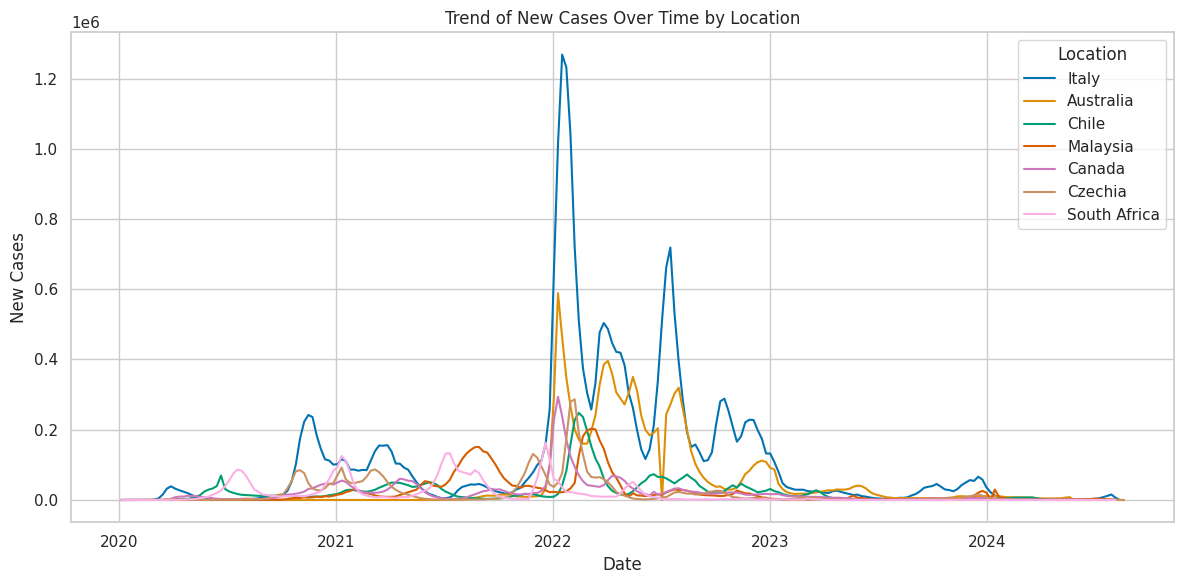

In [ ]:
# Aggregate or filter top N locations by total cases (optional)
top_locations = df.groupby('location')['new_cases'].sum().nlargest(7).index
df_top = df[df['location'].isin(top_locations)]

# Plot trends over time
plt.figure(figsize=(12, 6))
for loc in top_locations:
    loc_data = df_top[df_top['location'] == loc]
    plt.plot(loc_data['date'], loc_data['new_cases'], label=loc)

plt.title('Trend of New Cases Over Time by Location')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Location')
plt.tight_layout()
plt.show()


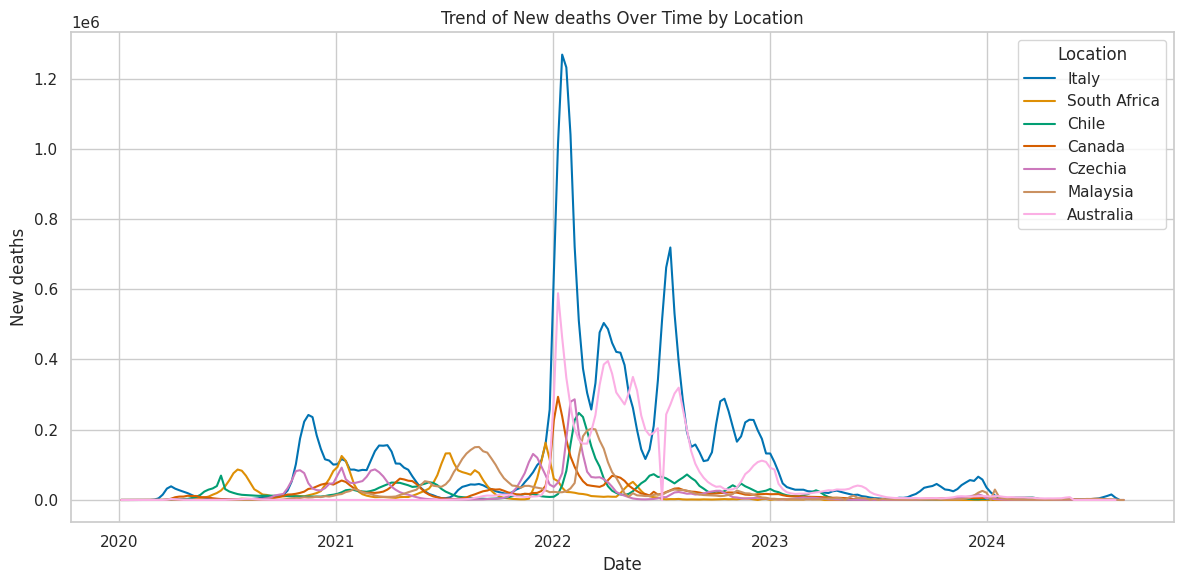

In [ ]:
# Aggregate or filter top N locations by total cases (optional)
top_locations = df.groupby('location')['new_deaths'].sum().nlargest(7).index
df_top = df[df['location'].isin(top_locations)]

# Plot trends over time
plt.figure(figsize=(12, 6))
for loc in top_locations:
    loc_data = df_top[df_top['location'] == loc]
    plt.plot(loc_data['date'], loc_data['new_cases'], label=loc)

plt.title('Trend of New deaths Over Time by Location')
plt.xlabel('Date')
plt.ylabel('New deaths')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

All countries experienced a peak of new cases in the year 2022, with Italy being the worst hit, followed by Australia, and South Africa being the least hit among the seven countries. The trend of new deaths is similar to New cases over time in all the countries, with Italy still showing more deaths and South Africa recording the least deaths.

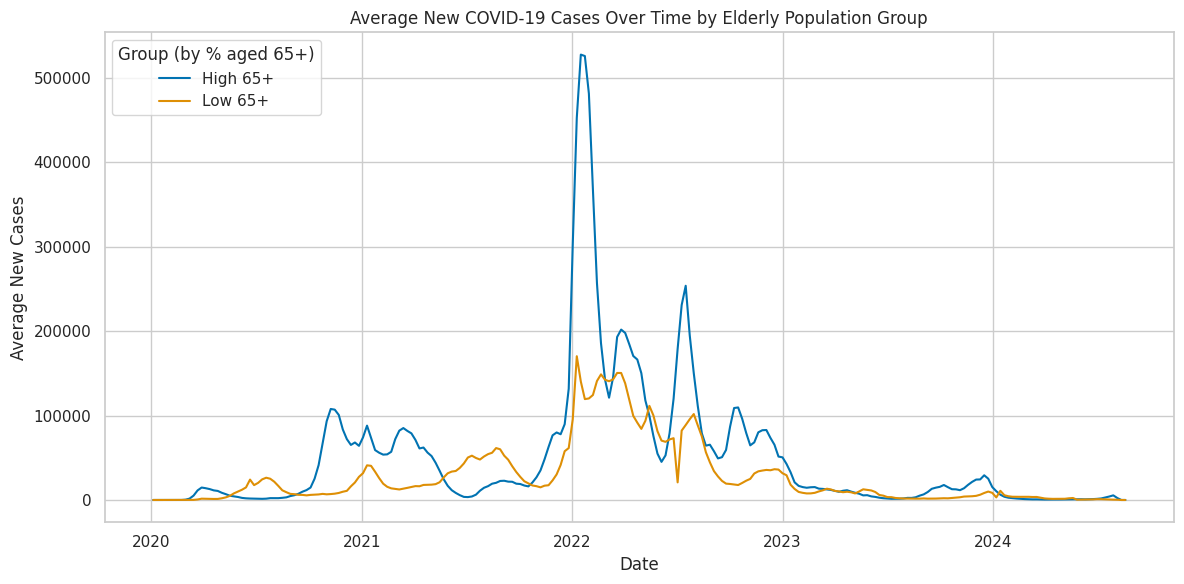

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing values
df_filtered = df.dropna(subset=['new_cases', 'aged_65_older'])

# Define threshold: median split (you could also use a fixed % like 10%)
threshold = df_filtered['aged_65_older'].median()

# Create a new column to group countries
df_filtered['elderly_group'] = df_filtered['aged_65_older'].apply(
    lambda x: 'High 65+' if x > threshold else 'Low 65+'
)

# Group by date and elderly group, and compute average new cases
grouped = df_filtered.groupby(['date', 'elderly_group'])['new_cases'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='date', y='new_cases', hue='elderly_group')
plt.title('Average New COVID-19 Cases Over Time by Elderly Population Group')
plt.xlabel('Date')
plt.ylabel('Average New Cases')
plt.grid(True)
plt.legend(title='Group (by % aged 65+)', loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Drop rows with missing values in aged_65_older
df_filtered = df.dropna(subset=['aged_65_older'])

# Step 2: Define threshold (median)
threshold = df_filtered['aged_65_older'].median()

# Step 3: Classify each row as High 65+ or Low 65+
df_filtered['elderly_group'] = df_filtered['aged_65_older'].apply(
    lambda x: 'High 65+' if x > threshold else 'Low 65+'
)

# Step 4: Get the most recent entry per country
df_latest = df_filtered.sort_values('date').drop_duplicates(subset='location', keep='last')

# Step 5: Extract countries in each group
high_65_countries = df_latest[df_latest['elderly_group'] == 'High 65+']['location'].unique()
low_65_countries = df_latest[df_latest['elderly_group'] == 'Low 65+']['location'].unique()

# Step 6: Print results
print("High 65+ Countries:\n", high_65_countries)
print("\nLow 65+ Countries:\n", low_65_countries)

# Optional: Save to CSV
pd.DataFrame({'High_65+_Countries': high_65_countries}).to_csv('high_65_countries.csv', index=False)
pd.DataFrame({'Low_65+_Countries': low_65_countries}).to_csv('low_65_countries.csv', index=False)


High 65+ Countries:
 ['Canada' 'Italy' 'Czechia']

Low 65+ Countries:
 ['Chile' 'Australia' 'South Africa' 'Malaysia']


/tmp/ipython-input-3152676482.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


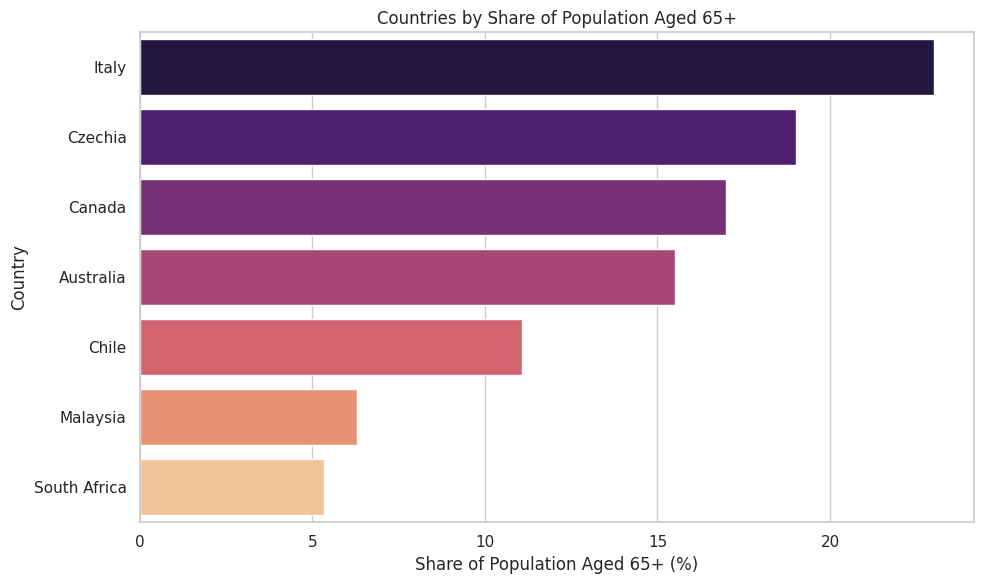

In [ ]:
# countries by share of  elderly population
top_elderly = df_latest.sort_values('aged_65_older', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_elderly,
    x='aged_65_older',
    y='location',
    palette='magma'
)
plt.title('Countries by Share of Population Aged 65+')
plt.xlabel('Share of Population Aged 65+ (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
